Проанализируйте скорость потребления контента по исследуемой игре — рассчитайте, какое
количество времени требуется на прохождение уровней различным группам пользователей
(iOS / Android, платящие / неплатящие). Есть ли у этих процессов динамика и тенденции?

In [ ]:
#рассчитывалось среднее время достижения уровня после события установки игры
levels=pd.read_sql(f'''

with data as
(SELECT event_time,user_id,platform,date_install,
  case WHEN payers is not null then 'payer' else 'not_payer' end as paying_type,
  event_name, extract(epoch from event_time-date_install)/3600/24::float as t
  FROM(SELECT  event_time, user_id, platform, 
     min(event_time) filter (where event_name='FirstLaunchApp') OVER(PARTITION BY user_id) as date_install,event_name
     FROM data_viz_1068.project_dataset
     WHERE user_id in
             (SELECT user_id
             FROM data_viz_1068.project_dataset
             WHERE event_name='FirstLaunchApp')) as a
  LEFT JOIN 
     (SELECT user_id as payers
     FROM data_viz_1068.project_dataset
     WHERE event_name='af_purchase') as p
  ON a.user_id=p.payers
  WHERE event_name like '%%level%%')
  

SELECT date_trunc('month', date_install), TRIM('achieve_level_' from event_name)::int as level, platform,paying_type, avg(t) as avg_time
FROM data
WHERE t>=0
GROUP BY 1,2,3,4
ORDER BY 1,2



''', con=engine)

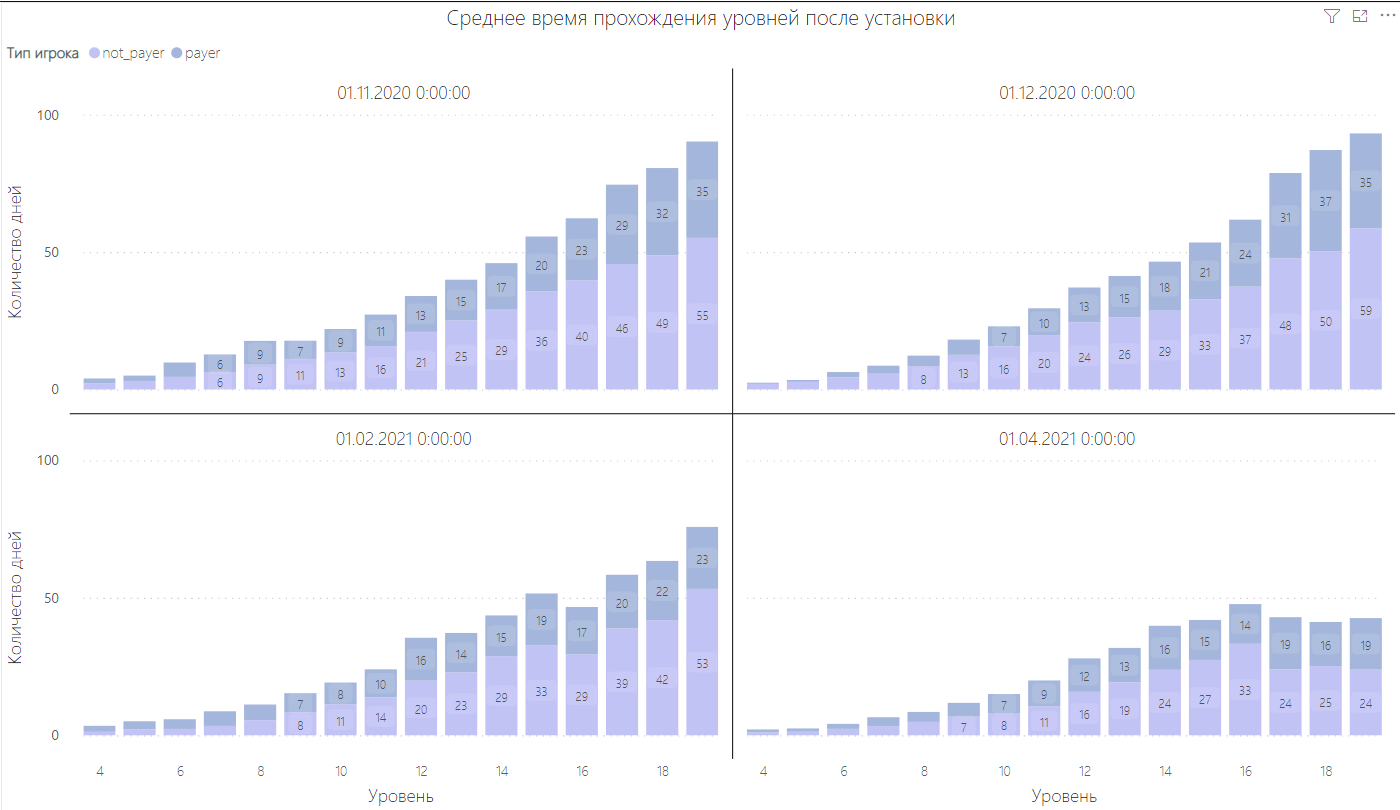

Вывод:

    Рассмотрим скорость потребления контента в зависимости от месяца установки игры - интервал 1-2 месяца. 
    В октябре видно, что довольно большое количестве дней занимает прохождение уровней у игроков и платящих и не платящих, однаков со временем количество дней на прохождение уровней меняется в меньшую сторону. Если вычитать средние показатели, то между уровнями времени проходит примерно одинаково после достижения 7-8 уровня, до этого игроки проходят игру быстрее. Говоря о типе игроков, то времени больше всего требуется не платящим, можно преположить, что играть им дается тяжелее. Редко можно заметить приближенно одинаковые значения по прохождению у обеих когорт.

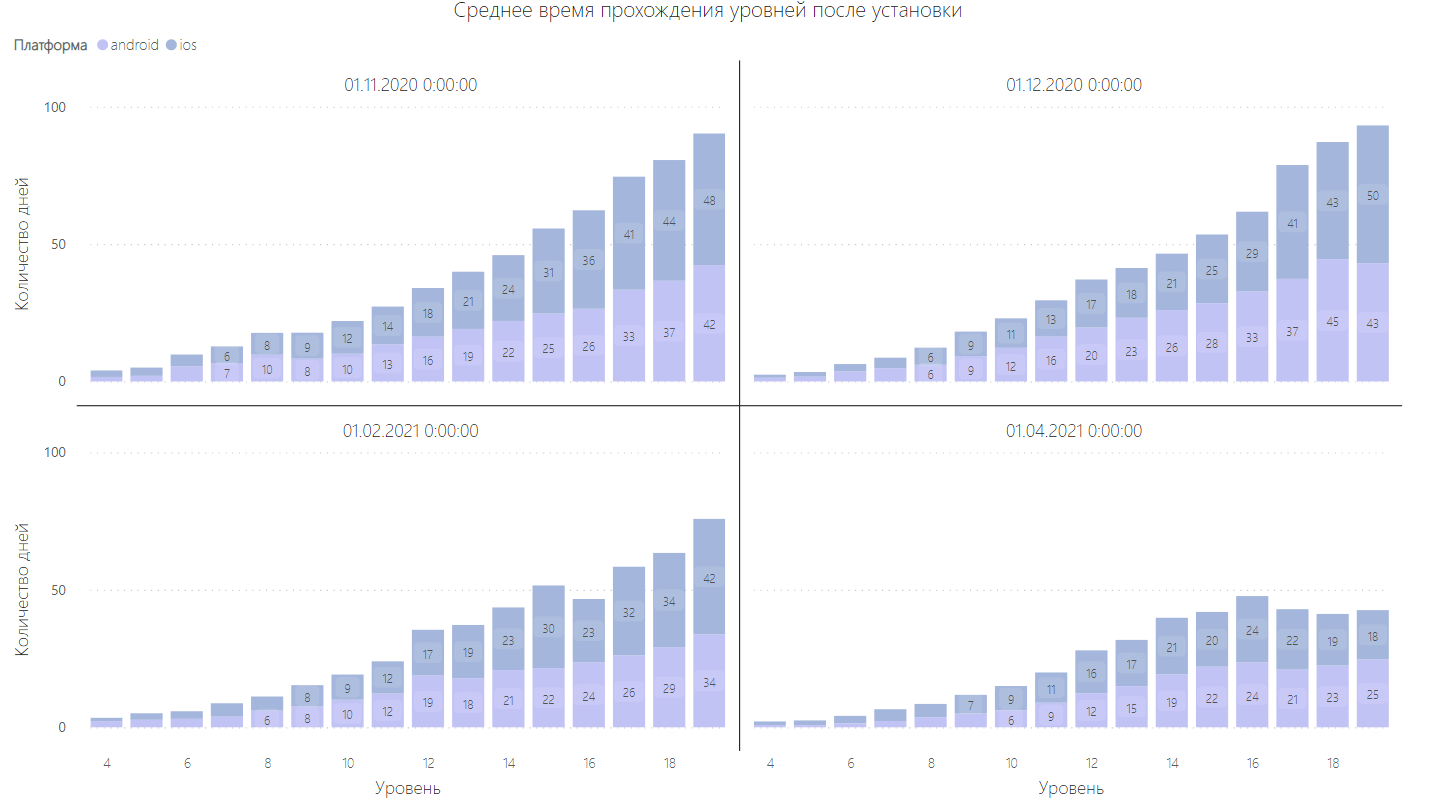

Вывод: 
        
        Ситуация по динамике аналогичная. Говоря о когортах, то быстрее всего справляются пользователи андроида, хотя есть и примерно одинаковое время между платформами.
        
        Таким образом, лучшие показатели были замечены у платящих пользователей, установивших игру ближе к концу выгрузки БД,т.е. в апреле 2021г на платформе android.